<strong><b><font size="5">Web Scraping e Análise de Dados</font></b></strong>

<strong><b><font size="5">Laboratório 4</font></b></strong>

<strong><b><font size="4">Data Science e Nutrição - Web Scraping e Análise Estatística</font></b></strong>

<strong><b><font size="4">Análise de Dados Para Montar o Cardápio Ideal</font></b></strong>

## Definição do Problema

Você já fez alguma refeição hoje? Se ainda não fez, deverá fazer em breve. Você saberia dizer quais são os ingredientes mais comuns nas refeições? E quais são os ingredientes que aparecem frequentemente juntos? E quais os métodos mais comuns no preparo de refeições? Qual a quantidade de porções usada com maior frequência? Qual a correlação entre os ingredientes para o cardápio ideal?

Responder essas e outras perguntas pode ajudar nutricionistas, escolas, restaurantes, indústrias de alimentos ou mesmo instituições de pesquisa, a fim de garantir que os padrões estejam sendo seguidos e que a saúde da população não esteja sendo comprometida com composições desbalanceadas de ingredientes.

Neste Lab trabalharemos nisso. Vamos analisar um conjunto de dados pouco comum, mas que vai ajudar você a pensar em diferentes problemas e o mais importante, em diferentes soluções. A Ciência de Dados pode ser aplicada a qualquer área, desde que nossa matéria-prima esteja disponível: dados.

E para responder nossas perguntas, vamos extrair e analisar a composição de receitas. Sim, isso mesmo. Receitas. De risoto, de frango e até de Fettuccine Alfredo!

O Web Scraping deste Lab é pesado e leva quase 50 minutos! Alguns parâmetros poderão reduzir esse tempo, mas nesse caso reduzirá também o volume de dados.

Para saber mais detalhes sobre alimentos e suas características, acesse:

<a href="https://www.abia.org.br/vsn/">ABIA - Associaçao Brasileira da Indústria de Alimentos</a>

Aqui tem um material de referência adicional que ajuda a explicar os benefícios da Ciência de Dados aplicada à Nutrição:

<a href="https://conferences.oreilly.com/strata/strata-ca-2019/public/schedule/detail/72551">Nutrition Data Science</a>

## Fonte de Dados

Nossa fonte de dados para o Web Scraping, será o portal <a href="https://www.allrecipes.com/">All Recipes</a> que contém receitas deliciosas. Navegue pelo site para compreender como os dados estão organizados. São várias páginas, cada qual com diversas receitas.

Observe que o <a href="https://www.allrecipes.com/">All Recipes</a> possui dois layouts HTML diferentes para suas páginas de receita, um layout regular e um layout que suporta a compra de ingredientes diretamente da página da receita. Esses dois layouts têm as informações que precisamos em locais diferentes, portanto, precisamos diferenciá-los durante a raspagem dos dados. Se o elemento de título que procuramos inicialmente estiver definido como 'Nenhum', precisamos procurar os elementos onde eles estariam no segundo layout (comprador).

Vamos então extrair diversas receitas, limpar os dados e avaliar ingredientes, métodos de preparo e outros dados disponíveis.

## Carregando os Pacotes Usados Neste Jupyter Notebook

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão Python:', python_version())

Versão Python: 3.7.3


In [3]:
# Imports

# Imports para Web Scraping
import bs4
import json
import requests
from bs4 import BeautifulSoup as bs

# Imports para manipulação, visualização e análise de dados
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

## Web Scraping

Primeiro, iremos criar uma função que será usada para criar um arquivo JSON (Java Script Object Notation) com o conteúdo do Web Scraping.

#### Caso não deseje aplicar o código do web scraping, os dados já estão sendo disponibilizados.

In [144]:
# Função que salva o conteúdo de cada página (as receitas de cada página) em um arquivo JSON
def salva_receita(title, 
                  layout, 
                  picture, 
                  servings, 
                  ingredients, 
                  method, 
                  prep_time, 
                  cook_time, 
                  additional_time, 
                  total_time):
    
    # Cria uma lista para receber o conteúdo das páginas, ou seja, todas as receitas em cada página
    lista_receitas = []
        
    # Define o nome do arquivo em disco
    receitas_arquivo = Path("dados/dataset2.json")
    
    # Verifica se o arquivo existe em disco e se existir carregamos o arquivo
    if receitas_arquivo.is_file():
        with open(receitas_arquivo) as in_file:
            lista_receitas = json.load(in_file)
        
        # Atribui False à variável de controle
        ja_existe = False
        
        # Vamos checar se a receita já está na lista
        for receita in lista_receitas:
            if receita['titulo'] == title:
                ja_existe = True
        
        # Se a receita não estiver na lista, então incluímos a receita
        if not ja_existe:
            print("Receita Incluída na Lista: {} ".format(title))
            nova_receita = {}
            nova_receita['titulo'] = title
            nova_receita['layout'] = layout
            nova_receita['imagem'] = picture
            nova_receita['ingredientes'] = ingredients
            nova_receita['metodo'] = method
            nova_receita['porcoes'] = servings
            nova_receita['tempo_preparo'] = prep_time
            nova_receita['tempo_cozimento'] = cook_time
            nova_receita['tempo_adicional'] = additional_time
            nova_receita['tempo_total'] = total_time
        
            # Adiciona a nova receita na lista
            lista_receitas.append(nova_receita)
    
            # Grava no arquivo
            with open(receitas_arquivo, 'w') as arquivo:
                json.dump(lista_receitas, arquivo, indent = 4) # parametro indent =4 pretty priting format 4 spaces
        else:
            print("Esta Receita já está na Lista: {} ".format(title))
            
    # Se o arquivo não existir, será criado pela primeira vez já com as receitas da primeira página 
    else:
        print("Receita Incluída na Lista: {} ".format(title))
        nova_receita = {}
        nova_receita['titulo'] = title
        nova_receita['layout'] = layout
        nova_receita['imagem'] = picture
        nova_receita['ingredientes'] = ingredients
        nova_receita['metodo'] = method
        nova_receita['porcoes'] = servings
        nova_receita['tempo_preparo'] = prep_time
        nova_receita['tempo_cozimento'] = cook_time
        nova_receita['tempo_adicional'] = additional_time
        nova_receita['tempo_total'] = total_time
        
        # Adiciona a nova receita na lista
        lista_receitas.append(nova_receita)
    
        # Grava no arquivo
        with open(receitas_arquivo, 'w') as arquivo:
            json.dump(lista_receitas, arquivo, indent = 4)

Na célula abaixo definimos o range de páginas de onde iremos extrair os dados. Visite a página abaixo para compreender o que estamos extraindo:

https://www.allrecipes.com/recipes/?page=102

Cada página contém diversas receitas e algumas receitas podem estar repetidas em diversas páginas. Por isso na função que criamos na célula acima checamos se a receita já foi extraída (pois não precisamos extrair novamente).

Navegue pela página, pesquise no código fonte e entenda com os dados estão organizados.

In [145]:
# Vamos definir quantas páginas de dados serão extraídas
# Evite colocar muitas páginas, pois o processo pode ser demorado

# Fiz o scraping com poucos dados para validações apenas.
primeira_pagina = 101
ultima_pagina = 101

Agora podemos extrair os dados. A célula abaixo leva bastante tempo, pois iremos extrair muitos dados. Seja paciente.

Link com conteúdo sobre BeautifulSoup select e find_all:

<a href="https://letscodepython.com/blog/2017/11/10/scraping-web-beautiful-soup/">Soup Select</a>

In [146]:
%%time

print("Iniciando Web Scraping! Vai tomar um cafézinho, vai!")

# Loop pelo range de páginas que foi definido com os 2 parâmetros anteriores
for page in range(primeira_pagina, ultima_pagina + 1):
    
    # Requisição à página
    source = requests.get("https://www.allrecipes.com/recipes?page=" + str(page))
    print("\nPágina Sendo Processada: {}".format(page))
    
    # Código fonte (HTML) da página
    doc = bs(source.text, 'html.parser')
    
    # Selecionando cada receita vinculada à página
    recipe_cards = doc.select('a.fixed-recipe-card__title-link')

    # Loop por todas as receitas da página
    for card in recipe_cards:        
        # Aqui estão os dados que iremos extrair
        
        # Inicialização das variáveis
        layout = 0
        ingredients_list = []
        method_list = []
        title, picture = '', ''
        prep_time, cook_time, total_time, additional_time, servings = '','','','',''
        
        # Dentro de cada item da lista existe um link referenciado. 
        # print(card)
        # Vamos acessar esse link para coletar as informações da receita.
        recipe_page_source = requests.get(card['href'])    
        
        # Extraindo o código fonte (HTML) dessa segunda página
        recipe_main = bs(recipe_page_source.text, 'html.parser')
        
        # Realizando a busca pelo titulo da receita em qualquer tag com a informação: .recipe-summary__h1
        title = recipe_main.select_one('.recipe-summary__h1')
        
        # Se o título não estiver em branco, extraímos os dados e nesse caso o layout é 1
        if title is not None:
            layout = 1
            title = title.text
            picture = recipe_main.select_one('.rec-photo').attrs['src']
            ingredients = recipe_main.select('.recipe-ingred_txt')
            method = recipe_main.select('.recipe-directions__list--item')
            servings = recipe_main.select_one('#metaRecipeServings')['content']
            meta_item_types = recipe_main.select('.prepTime__item--type')
            meta_item_times = recipe_main.select('.prepTime__item--time')
            
            # Queremos os tempos de preparo de cada receita. Vamos extrair.
            for label, time in zip(meta_item_types, meta_item_times):
                if label.text == 'Prep':
                    prep_time = time.text
                elif label.text =='Cook':
                    cook_time = time.text
                elif label.text == 'Additional':
                    additional_time = time.text
                elif label.text == 'Ready In':
                    total_time = time.text                
                
        # Se o título for None, a página é diferente e nesse caso o layout é igual a 2
        else:
            layout = 2
            # O nome real da class na tag h1 é: "headline heading-content", 
            # utilizamos o . no seletor de CSS para capturar toda a string
            title = recipe_main.select_one('h1.headline.heading-content').text
            picture = recipe_main.select_one('.inner-container img').attrs['src']
            ingredients = recipe_main.select('span.ingredients-item-name')
            method = recipe_main.select('div.paragraph p')
            meta_items = recipe_main.select('div.recipe-meta-item')
            
            for item in meta_items:
                parts = item.select('div')
                header = parts[0].text.strip()
                body = parts[1].text.strip()
                    
                if header == 'prep:':
                    prep_time = body
                elif header =='cook:':
                    cook_time = body
                elif header == 'additional:':
                    additional_time = body
                elif header == 'total:':
                    total_time = body
                elif header == 'Servings:':
                    servings = body
        
        # Adicionando todos os ingredientes dentro de lista
        for ingredient in ingredients:
            if ingredient.text != '':
                ingredients_list.append(ingredient.text.strip())
            
        # Adicioando a lista de métodos da receita
        for instruction in method:
            method_list.append(instruction.text.strip())
        
        # Se ingredientes ou lista de métodos estiverem vazios, não gravamos os dados
        if len(ingredients_list)==0 and len(method_list) == 0:
            pass
        else:
            # Se tudo ok chamamos a função e gravamos os dados em disco
            salva_receita(title, layout, picture, servings, ingredients_list, method_list, 
                          prep_time, cook_time, additional_time, total_time)
        
print("Web Scraping Concluído com Sucesso!")

Iniciando Web Scraping! Isso vai demorar. Seja paciente!

Página Sendo Processada: 101
Título da Receita: German Chocolate Cake Frosting II 
Receita Incluída na Lista: Curried Butternut Squash and Pear Soup 
Receita Incluída na Lista: Bacon Chicken and Dumplings 
Receita Incluída na Lista: Microwave Corn on the Cob 
Receita Incluída na Lista: Savory Crescent Chicken 
Receita Incluída na Lista: Veggie Pizza 
Receita Incluída na Lista: Garlic Roasted Chicken and Potatoes 
Receita Incluída na Lista: Taco Salad I 
Receita Incluída na Lista: Easiest Pot Roast Ever 
Receita Incluída na Lista: Chef John's Meatless Meatballs 
Receita Incluída na Lista: Chef John's Peanut Curry Chicken 
Receita Incluída na Lista: Barbeque Chicken 
Receita Incluída na Lista: Sesame Shrimp Stir-Fry 
Receita Incluída na Lista: Mushroom Slow Cooker Roast Beef 
Receita Incluída na Lista: Sesame Seared Tuna 
Receita Incluída na Lista: The Best Meatballs You'll Ever Have 
Receita Incluída na Lista: Split Pea and Ham S

## Análise de Dados

Agora, temos um objeto JSON que contém informações de receitas extraídas da web. Podemos usar esses dados e realizar algumas análises sobre os alimentos.

In [595]:
# Começamos carregando o arquivo
dados = pd.read_json(r'dados/dataset.json')

In [596]:
# Vamos organizar as colunas
dados = dados[['titulo', 
               'porcoes', 
               'tempo_cozimento', 
               'tempo_preparo', 
               'tempo_adicional', 
               'tempo_total', 
               'ingredientes', 
               'metodo', 
               'layout', 
               'imagem']]

In [597]:
# Shape
dados.shape

(1832, 10)

In [598]:
type(dados)

pandas.core.frame.DataFrame

In [599]:
# Tipos de dados
dados.dtypes

titulo             object
porcoes             int64
tempo_cozimento    object
tempo_preparo      object
tempo_adicional    object
tempo_total        object
ingredientes       object
metodo             object
layout              int64
imagem             object
dtype: object

In [600]:
# Visualiza os dados
dados.head(3)

,titulo,porcoes,tempo_cozimento,tempo_preparo,tempo_adicional,tempo_total,ingredientes,metodo,layout,imagem
0,Savory Crescent Chicken,4,,,,,"[1 (3 ounce) package cream cheese, softened, 1...",[Preheat oven to 350 degrees F (175 degrees C)...,2,https://imagesvc.meredithcorp.io/v3/mm/image?u...
1,Microwave Corn on the Cob,1,5 mins,,,5 mins,"[1 ear corn, husked and cleaned]","[Wet a paper towel, and wring out. Wrap the ea...",2,https://imagesvc.meredithcorp.io/v3/mm/image?u...
2,Easiest Pot Roast Ever,6,5 hrs,10 mins,,5 hrs 10 mins,"[3 pounds beef roast, 6 medium (2-1/4"" to 3"" d...","[Cut up potatoes, onions, and celery in to fai...",2,https://imagesvc.meredithcorp.io/v3/mm/image?u...


Fizemos um bom trabalho no Scraping.

### Quais são os ingredientes mais comuns nas receitas?

Vejamos os ingredientes que compõem cada receita um pouco mais de perto. Primeiro, queremos saber quais são os ingredientes mais comuns nas receitas.

Temos que limpar a lista de ingredientes para nos livrar do "ruído" e fazer com que nossas listas de nomes de ingredientes sejam formatadas sem unidades, números ou descritores.

In [601]:
# Lista de palavras que representam medidas de unidade. Não pecisaremos disso.
medidas_unidades = ['gallon',
                    'quart',
                    'pint',
                    'cup',
                    'teaspoon',
                    'tablespoon',
                    'ounce',
                    'pound',
                    'can',
                    'pinch',
                    'serving',
                    'slice',
                    'package',
                    'bottle']

In [602]:
# Lista de descritores. Isso também não será necessário.
descritores = ['small', 'medium', 'large']

In [603]:
# Lista para os ingredientes depois da limpeza
lista_ingredientes_limpos = []

In [604]:
# Loop pela coluna de ingredientes de cada receita
for item in dados['ingredientes']:
    
    # Ingrediente a ser processado
    lista_ings = item
    
    # Remove medidas de unidade e descritores
    for palavra in medidas_unidades + descritores:
        plural = palavra + "s"
        lista_ings = [item.replace(' ' + plural + ' ', ' ') for item in lista_ings]
        lista_ings = [item.replace(' ' + palavra + ' ',' ') for item in lista_ings]    
    
    # Remove outros descritores comuns
    lista_ings = [item.replace('boneless,','') for item in lista_ings] 
    lista_ings = [item.replace('skinless,','') for item in lista_ings] 
    lista_ings = [item.replace('boneless','') for item in lista_ings] 
    lista_ings = [item.replace('skinless','') for item in lista_ings] 
    
    # Remove parenteses
    lista_ings = [re.sub(r'\([^()]*\)','', item) for item in lista_ings]
    
    # Divide texto depois de vírgulas
    # De acordo com o padrão identificado, a informação após a virgula representa o modo de preparo do ingrediente.
    # O método partition é diferente do split. O partition divide a string na primeira ocorrência que aparecer.
    # Exemplo: [item.partition(',')[0] for item in ['abc,def,ghi,jkl']] 
    lista_ings = [item.partition(',')[0] for item in lista_ings] 
    
    # Remove qualquer coisa que não seja caracter
    lista_ings = [re.sub(r'[^a-zA-Z]', ' ', item) for item in lista_ings]
    
    # Removemos espaços adicionais que ficaram depois de remover os itens anteriores
    lista_ings = [item.strip() for item in lista_ings] 

    # Substituímos o plural pelo singular
    lista_ings = [item.replace('eggs', 'egg') for item in lista_ings] 
        
    lista_ingredientes_limpos.append(lista_ings)

In [605]:
# Criamos uma nova coluna no dataset após a limpeza
dados['ingredientes_limpos'] = lista_ingredientes_limpos

In [606]:
# Visualizamos os dados antes e depois da limpeza
dados[['ingredientes', 'ingredientes_limpos']].head()

,ingredientes,ingredientes_limpos
0,"[1 (3 ounce) package cream cheese, softened, 1...","[cream cheese, butter, cubed, minced onion, sa..."
1,"[1 ear corn, husked and cleaned]",[ear corn]
2,"[3 pounds beef roast, 6 medium (2-1/4"" to 3"" d...","[beef roast, s potatoes, baby carrots, yellow ..."
3,"[1 cup evaporated milk, 1 cup white sugar, 3 ...","[evaporated milk, white sugar, egg yolk, marga..."
4,"[3 slices bacon, 3 large potatoes, peeled and ...","[bacon, potatoes, onion, chicken breast halves..."


A partir daqui, podemos investigar quais ingredientes são os mais comuns. Primeiro, coletamos todos os nomes de ingredientes limpos em um único dataframe para que possamos plotá-lo.

In [607]:
# Lista de ingredientes
lista_ingredientes = []

In [608]:
# Loop
for linha in dados['ingredientes_limpos']:
    for item in linha:
        lista_ingredientes.append(item)

In [609]:
# Dataframe de ingredientes
ingredientes = pd.DataFrame(lista_ingredientes, columns = ['ingrediente'])

In [610]:
# Visualiza os dados
ingredientes.head(10)

,ingrediente
0,cream cheese
1,butter
2,cubed
3,minced onion
4,salt
5,ground black pepper
6,milk
7,chopped pimento peppers
8,refrigerated crescent rolls
9,butter


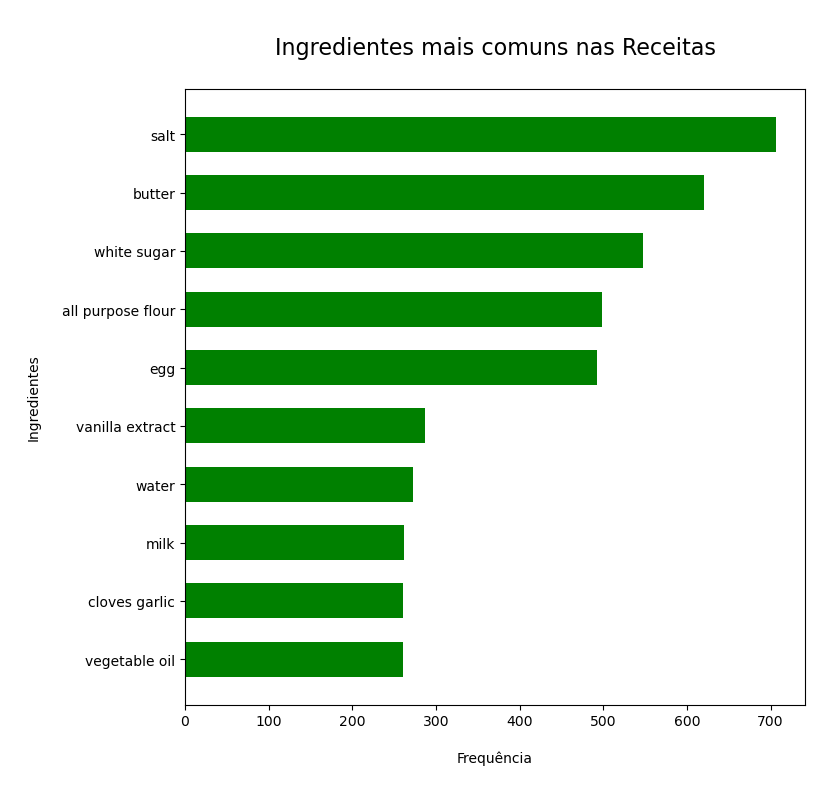

In [611]:
fig, ax = plt.subplots(figsize = (8,8))

Top_Ingredientes = 10
Qtd_Barras = np.arange(Top_Ingredientes)

# Selecionando a qtd de cada ingrediente e o nome de cada ingrediente
Qtd_Cada_Ingrediente = ingredientes['ingrediente'].value_counts().head(Top_Ingredientes)
Nome_Ingredientes = ingredientes['ingrediente'].value_counts().head(Top_Ingredientes).index

# barh: PLota o gráfico na horizontal
ax.barh(Qtd_Barras, Qtd_Cada_Ingrediente, 0.6, color = 'green')

# Seta o nome dos ingredientes em cada ponto do eixo y
ax.set_yticks(Qtd_Barras)
ax.set_yticklabels(Nome_Ingredientes)

# Define o Titulo do Gráfico
ax.set_title('\nIngredientes mais comuns nas Receitas\n', fontsize=16)

# Define a Legenda de cada eixo
ax.set_ylabel('\nIngredientes\n', fontsize=10)
ax.set_xlabel('\nFrequência\n', fontsize=10)

# Invertendo a ordenação do eixo Y
ax.invert_yaxis()

plt.show();

### Quais a distribuição dos tamanhos das porções?

Cada receita tem uma quantidade listada de porções. Os dados dessa variável já estão armazenados como valores inteiros, portanto, deve ser simples de visualizar.

In [613]:
dados['porcoes'].mean()

11.194323144104803

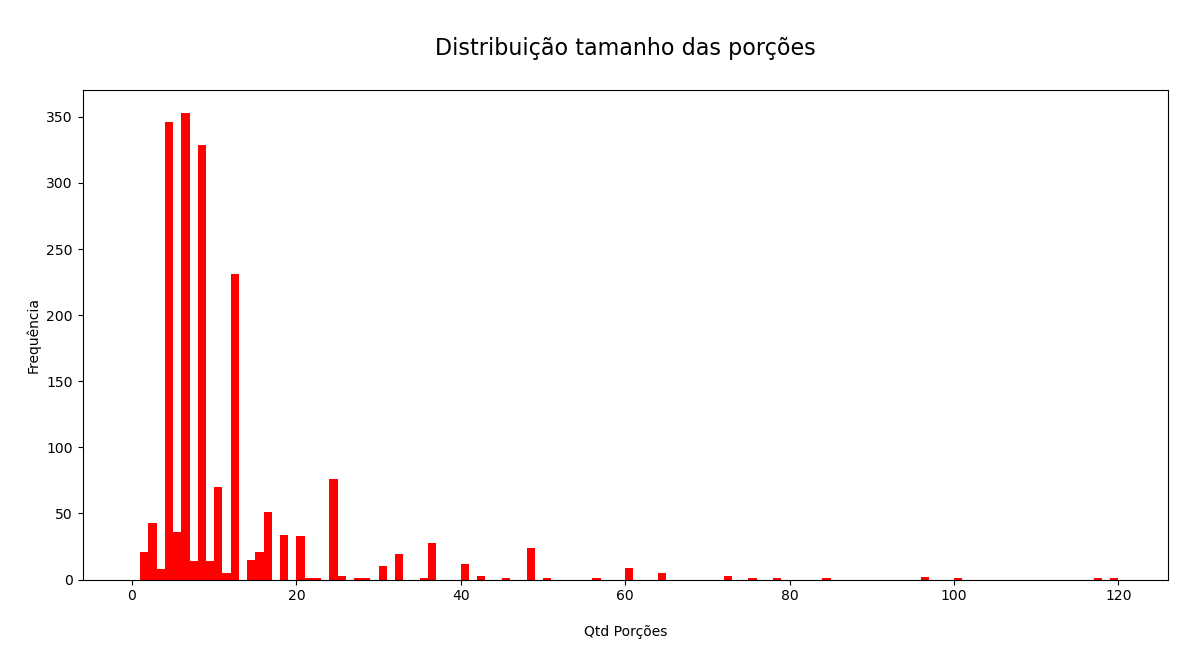

In [614]:
fig = plt.figure(figsize = (14,14))

bins_numero = dados['porcoes'].max()

# Criando 2 ambientes para plotagem
ax1 = fig.add_subplot(2,1,1)

# Plot Histograma:

# o range de valores será de 0 até o max porções
ax1.hist(dados['porcoes'], bins = bins_numero, range =(0, bins_numero), color = 'red');

# Define o Titulo do Gráfico
ax1.set_title('\nDistribuição tamanho das porções\n', fontsize=16)

# Seta o label dos eixos
ax1.set_ylabel('\nFrequência')
ax1.set_xlabel('\nQtd Porções')

plt.show();

In [615]:
# Descrição Estatistica de porções
dados.porcoes.describe()

count    1832.000000
mean       11.194323
std        11.537766
min         1.000000
25%         6.000000
50%         8.000000
75%        12.000000
max       120.000000
Name: porcoes, dtype: float64

### Quais as tendências que podem ser observadas nos títulos das receitas, com relação aos alimentos?

Podemos examinar os títulos de cada receita para encontrar tendências comuns entre todas elas.

In [616]:
# Lista de palavras nos títulos
lista_palavras_titulos = []

In [617]:
# Palavras que serão evitadas
palavras_evitar = ['I', 'II', 'III', 'and', 'with']

In [618]:
# Loop para extrair as palavras
for linha in dados['titulo']:
    for palavra in linha.split(' '):
        
        # Extrai somente os caracteres
        palavra = re.sub('[^a-zA-Z]', '', palavra)
        
        # Verifica se a palavra não existe na lista a ser ignorada e grava na lista final
        if not palavra in palavras_evitar:
            lista_palavras_titulos.append(palavra)

In [619]:
# Cria o dataframe com as palavras extraídas dos títulos
lista_palavras = pd.DataFrame(lista_palavras_titulos, columns = ['palavra'])

In [620]:
lista_palavras

,palavra
0,Savory
1,Crescent
2,Chicken
3,Microwave
4,Corn
...,...
6214,Crescent
6215,Rolls
6216,Easy
6217,Focaccia


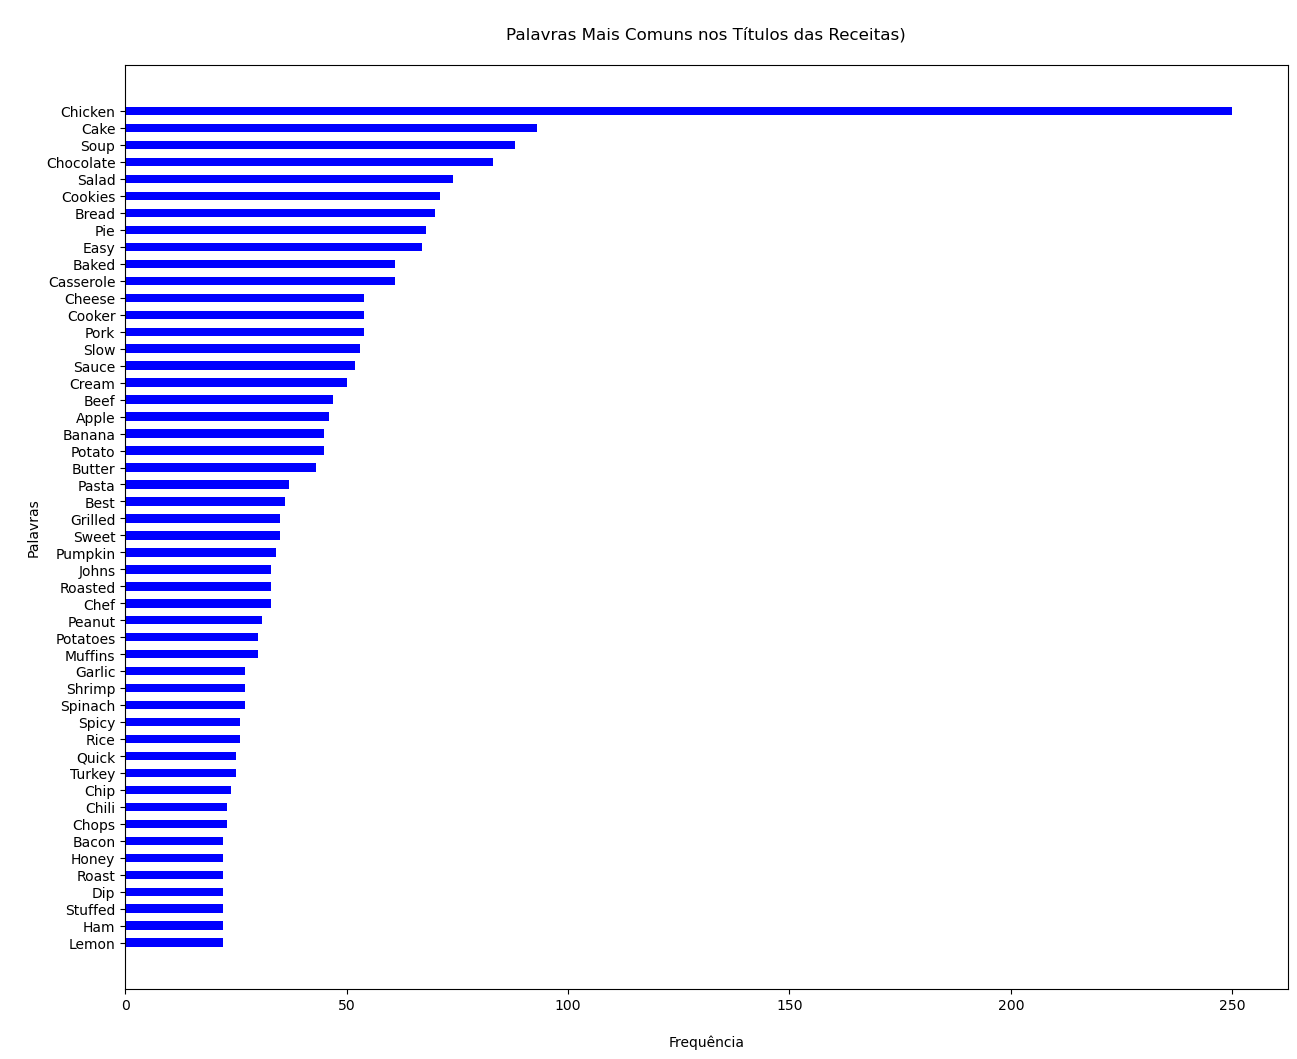

In [621]:
# Plot
fig, ax = plt.subplots(figsize = (15, 12))

n = 50
bar_positions = np.arange(n)

bar_heights = lista_palavras['palavra'].value_counts().head(n)
bar_names = lista_palavras['palavra'].value_counts().head(n).index

ax.barh(bar_positions, bar_heights, 0.5, color = 'blue')

ax.set_yticks(bar_positions)
ax.set_yticklabels(bar_names)

ax.set_title('\nPalavras Mais Comuns nos Títulos das Receitas)\n')

ax.set_ylabel('\nPalavras')
ax.set_xlabel('\nFrequência')

ax.invert_yaxis()

plt.show()

### Quais os verbos mais usados no preparo dos alimentos?

Em seguida, queremos analisar os 'verbos culinários' mais comuns usados nas instruções das receitas. No entanto, não temos uma boa maneira de extrair verbos especificamente das strings de instruções. Portanto, primeiro extrairemos os verbos mais comuns manualmente com um conjunto de dados fixo e depois contaremos as instâncias desses em conjuntos futuros. Esse processo é certamente imperfeito, mas como não temos um filtro para determinar verbos culinários de outros tipos de palavras, essa será a nossa abordagem.

In [622]:
# Lista de palavras
lista_palavras_verb = []

In [623]:
# Loop pelos métodos de preparo
for metodo in dados['metodo']:
    for instruction in metodo:
        palavras = instruction.split(' ')
        for palavra in palavras:
            palavra = re.sub('[^a-zA-Z]', '', palavra).lower()
            lista_palavras_verb.append(palavra)

In [624]:
# Cria o dataframe
palavras_metodo = pd.DataFrame(lista_palavras_verb, columns = ['palavra'])

In [625]:
palavras_metodo

,palavra
0,preheat
1,oven
2,to
3,
4,degrees
...,...
183508,from
183509,heat
183510,refrigerate
183511,until


Pesquisando manualmente as 100 principais palavras coletadas, compilamos a lista abaixo, salva como 'palavras_para_incluir'. Em seguida, recriamos a lista de palavras usando essa lista.

In [626]:
# Lista de palavras que representam "verbos culinários" (como cozinhar, mexer, misturar, etc...)
palavras_para_incluir = ['stir',
                         'cook',
                         'mix',
                         'place',
                         'add',
                         'bake',
                         'preheat',
                         'pour',
                         'cover',
                         'combine',
                         'remove',
                         'boil',
                         'cool',
                         'bring',
                         'simmer',
                         'set',
                         'sprinkle',
                         'beat',
                         'serve',
                         'drain',
                         'let']

In [627]:
# Lista
nova_lista = []

In [628]:
# Loop para criar a nova lista inserindo a lista de palavras acima
for metodo in dados['metodo']:
    for instruction in metodo:
        palavras = instruction.split(' ')
        for palavra in palavras:
            palavra = re.sub('[^a-zA-Z]', '', palavra).lower().strip()
            if palavra in palavras_para_incluir:
                nova_lista.append(palavra)

In [629]:
# Cria o dataframe
nova_lista_metodo = pd.DataFrame(nova_lista, columns = ['palavra'])

In [630]:
nova_lista_metodo

,palavra
0,preheat
1,beat
2,add
3,mix
4,place
...,...
15464,mix
15465,bring
15466,boil
15467,mix


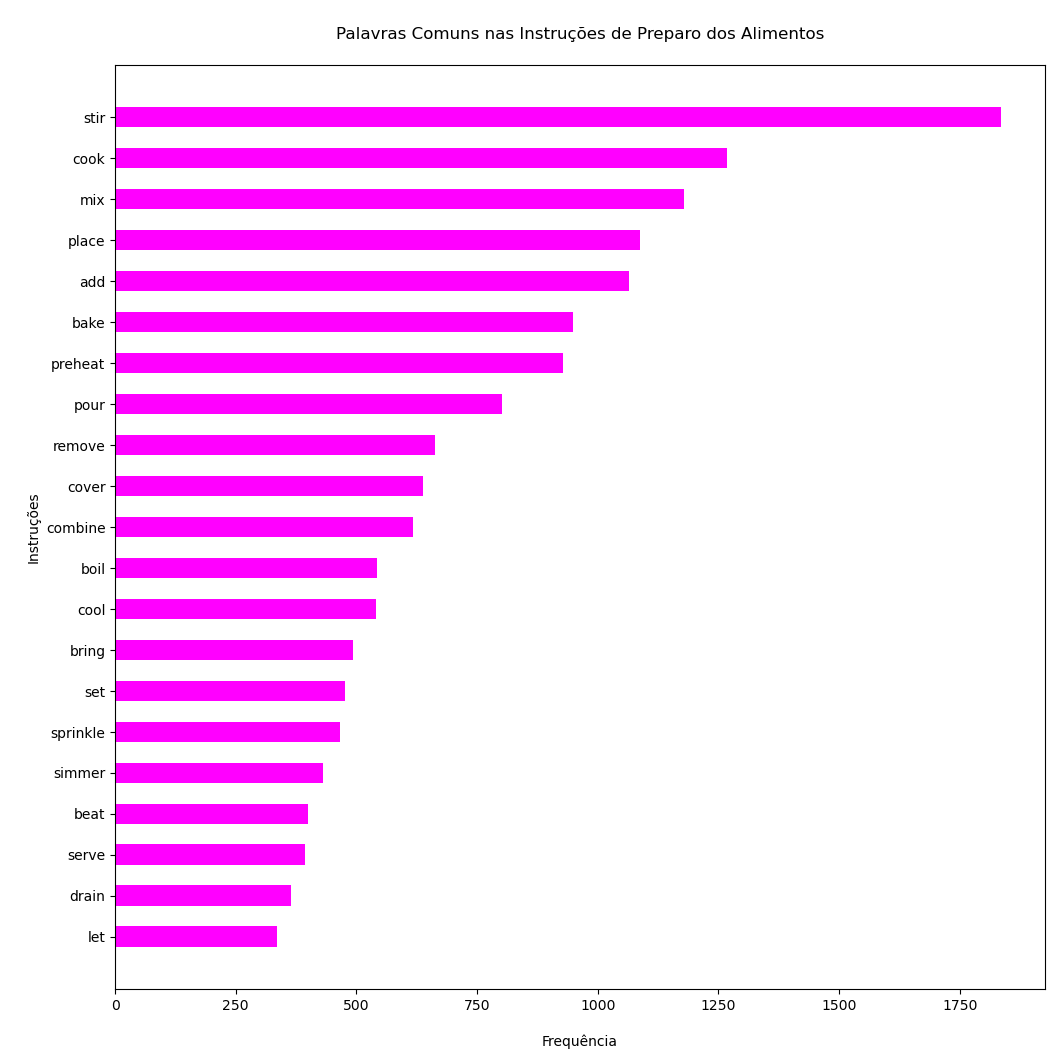

In [631]:
# Plot
fig, ax = plt.subplots(figsize = (12,12))

n = len(nova_lista_metodo['palavra'].value_counts())

bar_positions = np.arange(n)
bar_heights = nova_lista_metodo['palavra'].value_counts().head(n)
bar_names = nova_lista_metodo['palavra'].value_counts().head(n).index

ax.barh(bar_positions, bar_heights, 0.5, color = 'magenta')

ax.set_yticks(bar_positions)
ax.set_yticklabels(bar_names)

ax.set_title('\nPalavras Comuns nas Instruções de Preparo dos Alimentos\n')

ax.set_ylabel('\nInstruções')
ax.set_xlabel('\nFrequência')

ax.invert_yaxis()
plt.show();

### Quais ingredientes aparecem juntos com maior frequência?

A parte final da análise será extrair pares de ingredientes comuns. Abordaremos esse problema relativamente complexo em duas etapas.

Primeiro, vamos pegar um determinado ingrediente e encontrar seus pares mais comuns. Que tal batatas?

In [632]:
# Define um determinado ingrediente
ingrediente_escolhido = 'potatoes'

In [633]:
# Lista de valores booleanos
lista_verifica_ingrediente = []

In [634]:
# Lista para os pares dos ingredientes
pares_ingredientes = []

In [635]:
dados['ingredientes_limpos']

0       [cream cheese, butter, cubed, minced onion, sa...
1                                              [ear corn]
2       [beef roast, s potatoes, baby carrots, yellow ...
3       [evaporated milk, white sugar, egg yolk, marga...
4       [bacon, potatoes, onion, chicken breast halves...
                              ...                        
1827    [cream cheese, butter, all purpose flour, any ...
1828    [cooking spray, milk, prepared ranch dressing,...
1829    [s potatoes, active dry yeast, warm water, whi...
1830    [bread flour, unbleached all purpose flour, sa...
1831    [roma  tomatoes, roma  tomatoes, garlic powder...
Name: ingredientes_limpos, Length: 1832, dtype: object

In [636]:
# Loop que verifica se o ingrediente que escolhemos ("potatoes") existe na lista de ingredientes limpos
for linha in dados['ingredientes_limpos']:    
    tem_ing = False
    
    for item in linha:
        if item == ingrediente_escolhido:
            tem_ing = True
            
    lista_verifica_ingrediente.append(tem_ing)

In [637]:
dados[lista_verifica_ingrediente]['ingredientes_limpos']

4       [bacon, potatoes, onion, chicken breast halves...
310     [onion, vegetable oil, potatoes, salt, cayenne...
424     [margarine, onion, head cabbage, water, potato...
517     [potatoes, sliced bacon, processed American ch...
583     [potatoes, butter, cubed fully cooked ham, oni...
662     [carrots, potatoes, onion, head green cabbage,...
848     [potatoes, olive oil, dried thyme, garlic powd...
889     [butter, onion, cloves garlic, potatoes, carro...
912     [turkey carcass, water, potatoes, carrots, sta...
1175    [ground cinnamon, ground cumin, kosher salt, g...
1223    [potatoes, all purpose flour, baking powder, s...
1364    [cooking spray, butter, cloves garlic, all pur...
1434    [butter, leeks, onion, water, potatoes, carrot...
1500    [potatoes, zucchini, red onions, eaches ripe t...
1551    [egg, bacon, Dijon mustard, mayonnaise, stalks...
1580    [shortening, potatoes, salt, ground black pepp...
1610    [bacon, stalks celery, onion, margarine, salt ...
1685    [groun

In [638]:
# Loop para buscar os ingredientes que aparecem sempre que "potatoes" aparece na receita.
# Aplica um slicing na coluna ingredientes_limpos onde o index na lista_verifica_ingrediente é TRUE
for linha in dados[lista_verifica_ingrediente]['ingredientes_limpos']:    
    for item in linha:
        if item == ingrediente_escolhido:
            continue
        else:
            pares_ingredientes.append(item)

In [639]:
# Cria o dataframe
df_pares_ingredientes = pd.DataFrame(pares_ingredientes, columns = ['pares'])

In [640]:
df_pares_ingredientes['pares'].value_counts().head(20)

onion                                    11
milk                                      7
salt                                      7
butter                                    7
salt and pepper to taste                  6
carrots                                   6
all purpose flour                         4
water                                     4
ground black pepper                       4
dried thyme                               4
cloves garlic                             3
olive oil                                 3
bacon                                     3
chicken broth                             3
chopped fresh parsley                     3
garlic powder                             3
stalks celery                             3
egg                                       2
whole kernel corn                         2
salt and ground black pepper to taste     2
Name: pares, dtype: int64

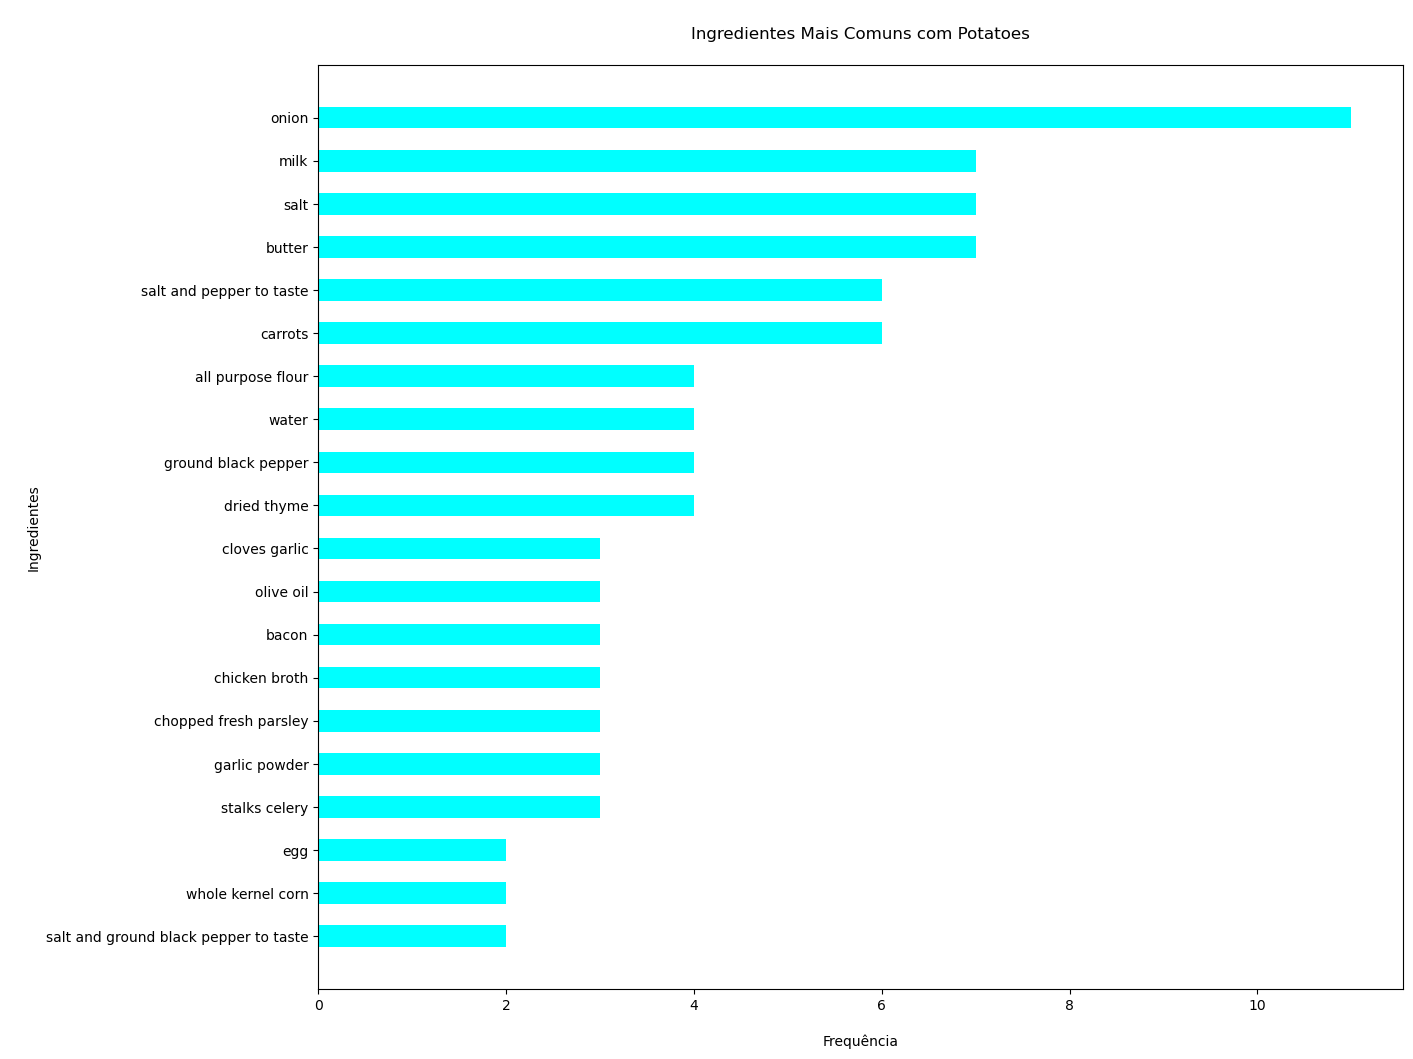

In [643]:
# Plot
#n = len(df_pares_ingredientes['pares'].value_counts())
n = 20

fig, ax = plt.subplots(figsize = (14,12))

bar_positions = np.arange(n)
bar_heights = df_pares_ingredientes['pares'].value_counts().head(n)
bar_names = df_pares_ingredientes['pares'].value_counts().head(n).index

ax.barh(bar_positions, bar_heights, 0.5, color = 'cyan')

ax.set_yticks(bar_positions)
ax.set_yticklabels(bar_names)

ax.set_title('\nIngredientes Mais Comuns com ' + ingrediente_escolhido.lower().capitalize() + '\n')

ax.set_ylabel('\nIngredientes')
ax.set_xlabel('\nFrequência')

ax.invert_yaxis()
plt.show();

Vamos filtrar os top 100.

In [644]:
# Especifica quantos dos ingredientes mais comuns devem ser considerados
# Estamos utilizando um dataframe que foi utilizado nas primeiras análises.
top_n = 100  
top_n_ingredientes = ingredientes['ingrediente'].value_counts().head(top_n).index

In [645]:
top_n_ingredientes

Index(['salt', 'butter', 'white sugar', 'all purpose flour', 'egg',
       'vanilla extract', 'water', 'milk', 'cloves garlic', 'vegetable oil',
       'olive oil', 'onion', 'ground black pepper', 'ground cinnamon',
       'baking powder', 'baking soda', 'salt and pepper to taste',
       'brown sugar', 'garlic powder', 'grated Parmesan cheese', 'soy sauce',
       'cream cheese', 'shredded Cheddar cheese', 'lemon juice',
       'chicken broth', 'packed brown sugar', 'chopped onion', 'dried oregano',
       'mayonnaise', 'paprika', 'cayenne pepper', 'confectioners  sugar',
       'sour cream', 'clove garlic', 'Worcestershire sauce', 'ground cumin',
       'chopped walnuts', 'chicken breast halves', 'honey', 'ground nutmeg',
       'cornstarch', 'minced garlic', 'dried basil',
       'semisweet chocolate chips', 'chili powder',
       'salt and ground black pepper to taste', 'heavy cream',
       'chopped fresh parsley', 'dried thyme', 'margarine', 'ground beef',
       'carrots', 'shor

In [646]:
# Listas de controle
todos_pares_ingredientes = []
lista_verificados = [] 

In [647]:
# Loop
for ing in top_n_ingredientes:
    
    lista_verifica_ingrediente = []
    
    # Cria uma máscara booleana para encontrar todas as linhas que contêm o ingrediente atual
    for linha in dados['ingredientes_limpos']:
        tem_ing = False
        for item in linha:
            if item == ingrediente_escolhido:
                tem_ing = True
                
        lista_verifica_ingrediente.append(tem_ing)
        
    # Pesquisa cada linha identificada pela máscara booleana e registra quais ingredientes aparecem com ela
    for linha in dados[lista_verifica_ingrediente]['ingredientes_limpos']:
        for item in linha:
            if item == ingrediente_escolhido:
                continue
            elif item in lista_verificados:
                continue
            else:
                tupla = (ingrediente_escolhido, item)
                todos_pares_ingredientes.append(tupla)
                
    lista_verificados.append(ingrediente_escolhido)

In [648]:
# Dataframe com pares de ingredientes
pares_ingredientes = pd.DataFrame(todos_pares_ingredientes, columns = ['ing1', 'ing2'])

In [649]:
# Combina os pares de ingredientes
pares_ingredientes['combinados'] = pares_ingredientes['ing1'] + ' / ' + pares_ingredientes['ing2']

In [650]:
# Visualiza os dados
pares_ingredientes.head(10)

,ing1,ing2,combinados
0,potatoes,bacon,potatoes / bacon
1,potatoes,onion,potatoes / onion
2,potatoes,chicken breast halves diced,potatoes / chicken breast halves diced
3,potatoes,chicken broth,potatoes / chicken broth
4,potatoes,poultry seasoning,potatoes / poultry seasoning
5,potatoes,salt and pepper to taste,potatoes / salt and pepper to taste
6,potatoes,whole kernel corn,potatoes / whole kernel corn
7,potatoes,half and half,potatoes / half and half
8,potatoes,biscuit mix,potatoes / biscuit mix
9,potatoes,milk,potatoes / milk


In [651]:
# Conta os elementos
pares_ingredientes['combinados'].value_counts().head()

potatoes / onion                       1100
potatoes / butter                       700
potatoes / salt                         700
potatoes / milk                         700
potatoes / salt and pepper to taste     600
Name: combinados, dtype: int64

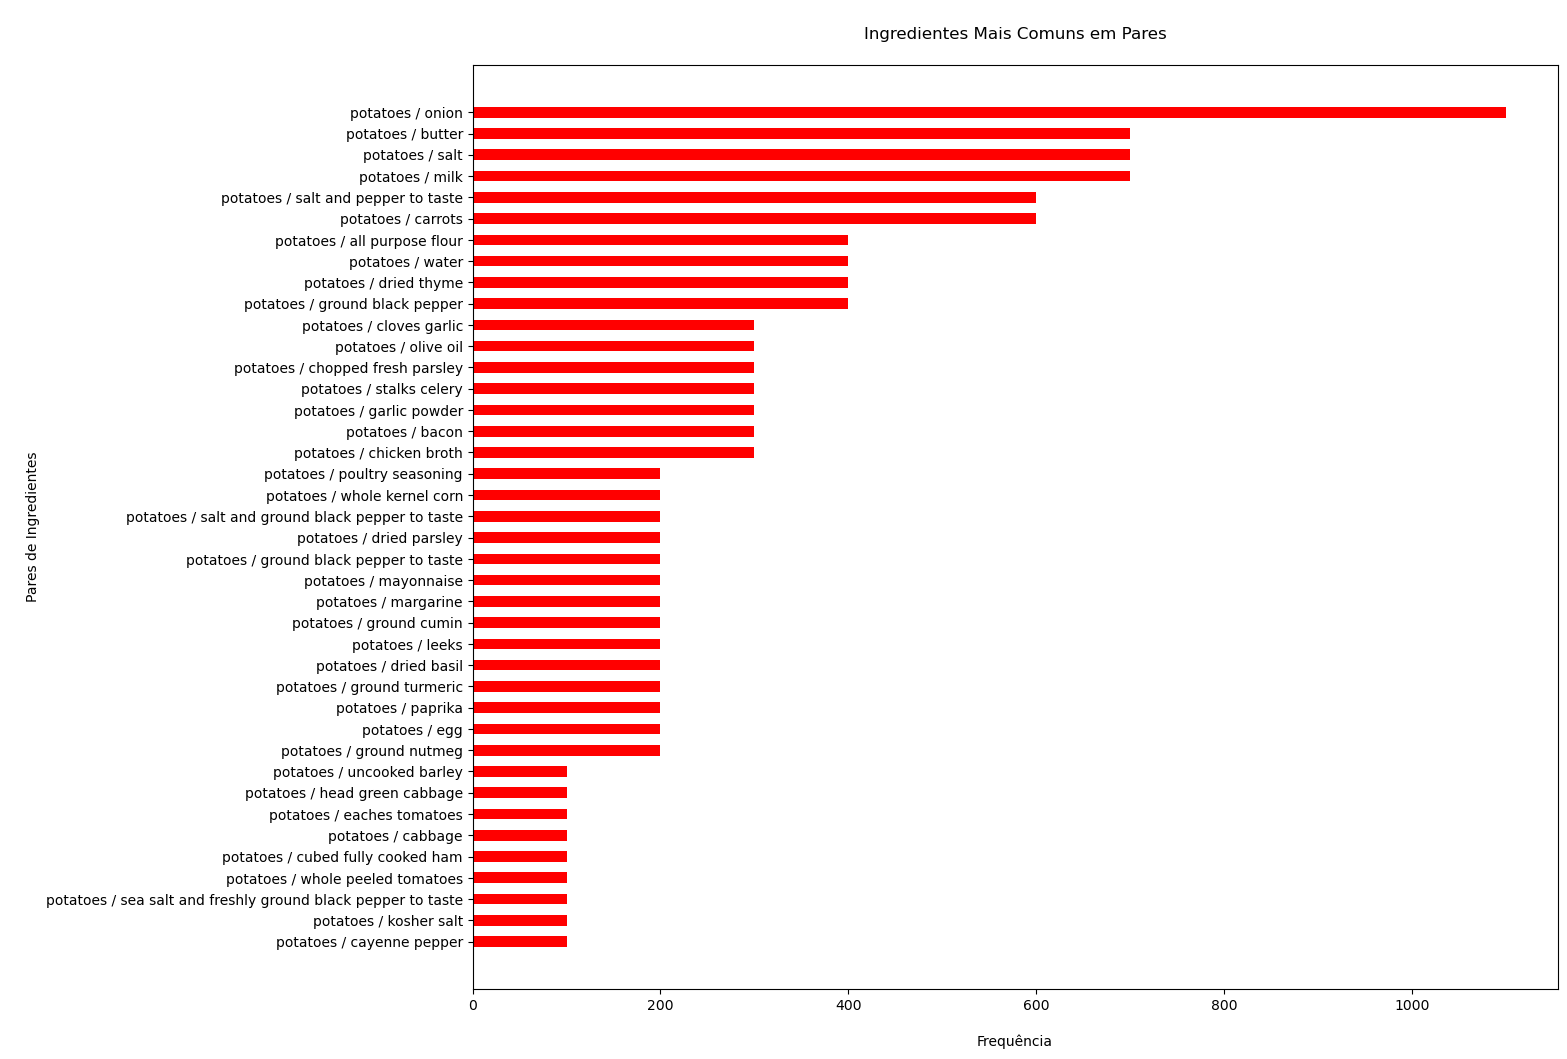

In [654]:
# Plot
# n = len(pares_ingredientes['combinados'].value_counts())
n = 40

fig, ax = plt.subplots(figsize = (14,12))

bar_positions = np.arange(n)
bar_heights = pares_ingredientes['combinados'].value_counts().head(n)
bar_names = pares_ingredientes['combinados'].value_counts().head(n).index

ax.barh(bar_positions, bar_heights, 0.5, color = 'red')

ax.set_yticks(bar_positions)
ax.set_yticklabels(bar_names)

ax.set_title('\nIngredientes Mais Comuns em Pares\n')

ax.set_ylabel('\nPares de Ingredientes')
ax.set_xlabel('\nFrequência')

ax.invert_yaxis()
plt.show()